In [1]:
pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [1]:
from rdflib import Graph
import pandas as pd
import numpy as np

# TTL 파일 목록
default_ttl_files = [
    "./data/administrative-area.ttl",
    "./data/bus-station.ttl", 
    "./data/electronic-car.ttl",
    "./data/Income-average.ttl",
    "./data/welfare.ttl"
]

def load_graph(ttl_files):
    """
    주어진 TTL 파일들을 하나의 Graph에 로드
    """
    g = Graph()
    for file in ttl_files:
        try:
            g.parse(file, format="ttl")
            print(f"Loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return g

def run_sparql_query(graph, query):
    """
    그래프와 쿼리를 받아서 실행 후 DataFrame으로 반환
    """
    results = graph.query(query)
    cols = results.vars  # SELECT 절 변수명
    data = []

    for row in results:
        data.append([str(row.get(var)) for var in cols])

    df = pd.DataFrame(data, columns=[str(var) for var in cols])
    return df

In [6]:
g = load_graph(default_ttl_files)

Loaded: ./data/administrative-area.ttl
Loaded: ./data/bus-station.ttl
Loaded: ./data/electronic-car.ttl
Loaded: ./data/Income-average.ttl
Loaded: ./data/welfare.ttl


In [29]:
# 샘플 쿼리
query = """
    PREFIX schema: <http://schema.org/>

    SELECT ?지역명 ?충전소명 ?위도 ?경도
    WHERE {
        ?atm a schema:AutomatedTeller ;
            schema:name ?충전소명 ;
            schema:addressLocality ?지역 ;
            schema:latitude ?위도 ;
            schema:longitude ?경도 .
        ?지역 schema:name ?지역명 .
        FILTER(CONTAINS(LCASE(?지역명), "서울") && CONTAINS(LCASE(?지역명), "동작구"))
    }
    ORDER BY ?충전소명
"""

# 쿼리 실행
df = run_sparql_query(g, query)
df

,지역명,충전소명,위도,경도
0,서울특별시 동작구,관악동작지사,37.47830829,126.9809567
1,서울특별시 동작구,대방성원 아파트,37.509731742,126.9259166877
2,서울특별시 동작구,대방중간집하장 공영주차장,37.5138842628831,126.930927452442
3,서울특별시 동작구,대우유로카운티,37.5054012556,126.9493141059
4,서울특별시 동작구,동작상떼빌 아파트,37.487899553,126.906937744
5,서울특별시 동작구,래미안상도3차아파트,37.49815,126.953982
6,서울특별시 동작구,보라매아카데미타워 아파트,37.4912743812,126.9240940365
7,서울특별시 동작구,빙수골 장미주차장,37.493303809459974,126.93367320891889
8,서울특별시 동작구,사당롯데캐슬샤인,37.4909601775,126.9715998344
9,서울특별시 동작구,상도대림 아파트,37.4931852401,126.9532620463


In [40]:
# 샘플 쿼리
query = """
    PREFIX schema: <http://schema.org/>

    SELECT * 
    WHERE {
    ?s ?p ?o
    }
"""

# 쿼리 실행
df = run_sparql_query(g, query)
df

,p,o,s
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://schema.org/BusStop,http://labs.datahub.kr/egs/busStation/GGB20800...
1,http://schema.org/identifier,36460,http://labs.datahub.kr/egs/busStation/TSB34300...
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://schema.org/BusStop,http://labs.datahub.kr/egs/busStation/ASB28800...
3,http://schema.org/identifier,32010,http://labs.datahub.kr/egs/busStation/CCB25000...
4,http://schema.org/longitude,126.66527295,http://labs.datahub.kr/egs/busStation/GUB2610760
...,...,...,...
1698457,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://schema.org/BusStop,http://labs.datahub.kr/egs/busStation/TSB28100...
1698458,http://schema.org/name,은못이사거리,http://labs.datahub.kr/egs/busStation/GGB21800...
1698459,http://schema.org/addressLocality,경기도 안성시,http://labs.datahub.kr/egs/busStation/GGB23100...
1698460,http://purl.org/dc/terms/identifier,ICB166000454,http://labs.datahub.kr/egs/busStation/ICB16600...


In [22]:
query = """
            PREFIX schema: <http://schema.org/>
            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
            PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

            SELECT ?지역명 ?평균소득
            WHERE {
                ?area a schema:AdministrativeArea ;
                    schema:amount ?amount ;
                    rdfs:label ?지역명 .
                
                # 문자열을 숫자로 변환
                BIND(xsd:decimal(?amount) AS ?평균소득)
                
                FILTER(?평균소득 > 0)
            }
            ORDER BY DESC(?평균소득)
"""

# 쿼리 실행
df1 = run_sparql_query(g, query)
df1

,지역명,평균소득
0,서울특별시 용산구,67397
1,서울특별시 강남구,61055
2,서울특별시 서초구,60725
3,경기도 성남시 분당구,54645
4,경기도 과천시,50809
...,...,...
247,경상북도 의성군,31420
248,전라남도 신안군,31392
249,경상북도 영덕군,31186
250,전라남도 고흥군,31062


In [ ]:
# 샘플 쿼리
query = """
PREFIX schema: <http://schema.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?지역명 (COUNT(?버스) AS ?버스정류장수)
WHERE {
?버스 a schema:BusStop ;
        schema:addressLocality ?지역명 .
} GROUP BY ?지역명
"""

# 쿼리 실행
df2 = run_sparql_query(g, query)
df2

,지역명,버스정류장수
0,경상북도 안동시,2376
1,경상북도 예천군,949
2,충청남도 아산시,2425
3,충청북도 보은군,1055
4,부산광역시,9815
...,...,...
155,전라북도 순창군,512
156,경상남도 산청군,415
157,전라남도 신안군,517
158,경상남도 통영시,795


In [ ]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF

# 네임스페이스 정의
SCHEMA = Namespace("http://schema.org/")

# TTL 파일 읽기
g = Graph()
g.parse("./data/electronic-car.ttl", format="turtle")

for at in g.subjects(RDF.type, SCHEMA.AutomatedTeller):
    address = g.value(at, SCHEMA.address)
    if address:
        addr_parts = str(address).split()  # 공백 기준으로 분리

        if any(x in addr_parts[0] for x in ["특별시", "광역시", "자치도"]):
            locality = " ".join(addr_parts[:2])
        else:
            locality = " ".join(addr_parts[:3])  # 앞 두 요소 합치기

        # 기존 schema:addressLocality 제거
        g.remove((at, SCHEMA.addressLocality, None))

        # 새 값 추가
        g.add((at, SCHEMA.addressLocality, Literal(locality)))

# 수정된 TTL 저장
g.serialize("./data/electronic-car-charger.ttl", format="turtle")
print("TTL 파일이 성공적으로 업데이트되었습니다.")

TTL 파일이 성공적으로 업데이트되었습니다.


In [8]:
query = """
            PREFIX schema: <http://schema.org/>
            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
            PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

            SELECT ?지역명 ?평균소득 ?충전소수
            WHERE {
                # 지역별 소득 정보
                ?area a schema:AdministrativeArea ;
                    schema:amount ?amount ;
                    rdfs:label ?지역명 .
                
                BIND(xsd:decimal(?amount) AS ?평균소득)
                
                # 지역별 전기차 충전소 수 계산
                {
                    SELECT ?지역명 (COUNT(?station) AS ?충전소수)
                    WHERE {
                        ?station a schema:AutomatedTeller ;
                                schema:addressLocality ?지역명 .
                    }
                    GROUP BY ?지역명
                }
                
                FILTER(?평균소득 > 0)
            }
            ORDER BY DESC(?평균소득)
"""

# 쿼리 실행
df = run_sparql_query(g, query)
df

,지역명,평균소득,충전소수
0,서울특별시 용산구,67397,None
1,서울특별시 강남구,61055,None
2,서울특별시 서초구,60725,None
3,경기도 성남시 분당구,54645,None
4,경기도 과천시,50809,None
...,...,...,...
247,경상북도 의성군,31420,None
248,전라남도 신안군,31392,None
249,경상북도 영덕군,31186,None
250,전라남도 고흥군,31062,None


In [4]:
df.drop_duplicates()

,지역명_full,평균소득,충전소수
0,서울특별시 용산구,67397,19
2,서울특별시 용산구,67397,16
3,서울특별시 강남구,61055,53
5,서울특별시 강남구,61055,28
6,서울특별시 강남구,61055,16
...,...,...,...
597,전라남도 신안군,31392,40
598,경상북도 영덕군,31186,5
600,전라남도 고흥군,31062,40
601,전라남도 고흥군,31062,6


In [61]:
df = df.loc[df['충전소수']!='None']
df.reset_index(inplace=True, drop=True)
df

,지역명,평균소득,충전소수
0,서울특별시 용산구,67397,19
1,서울특별시 강남구,61055,53
2,서울특별시 서초구,60725,48
3,경기도 과천시,50809,8
4,서울특별시 송파구,47023,46
...,...,...,...
204,경상북도 의성군,31420,11
205,전라남도 신안군,31392,6
206,경상북도 영덕군,31186,5
207,전라남도 고흥군,31062,6


In [5]:
df.head(10)

,지역명,평균소득,충전소수
0,서울특별시 용산구,67397,19
1,서울특별시 강남구,61055,53
2,서울특별시 서초구,60725,48
3,경기도 성남시 분당구,54645,None
4,경기도 과천시,50809,8
5,경기도 용인시 수지구,49160,None
6,경기도 수원시 영통구,47116,None
7,서울특별시 송파구,47023,46
8,경기도 안양시 동안구,43426,None
9,서울특별시 양천구,43402,24


In [4]:
df.loc[df['지역명'].str.contains('화성시')]

,지역명,평균소득,충전소수
15,경기도 화성시,42860,65


In [62]:
# '평균소득'과 '충전소수' 사이의 스피어만 상관계수 구하고, scatter chart(추세선 포함) 그리기

from scipy.stats import spearmanr

r, p_value = spearmanr(df['평균소득'], df['충전소수'])
print("Spearman r:", r, "p-value:", p_value)

Spearman r: 0.02785054673788979 p-value: 0.6889402677154057


In [66]:
df['충전소수'] = df['충전소수'].astype(int)
df['평균소득'] = df['평균소득'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     209 non-null    object
 1   평균소득    209 non-null    int64 
 2   충전소수    209 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


/var/folders/3k/09hbppyx33z8tmqmvw42bgqm0000gn/T/ipykernel_82131/1818701711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['충전소수'] = df['충전소수'].astype(int)
/var/folders/3k/09hbppyx33z8tmqmvw42bgqm0000gn/T/ipykernel_82131/1818701711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평균소득'] = df['평균소득'].astype(int)


/Users/jeongyunl/opt/anaconda3/envs/juso_chat_search/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongyunl/opt/anaconda3/envs/juso_chat_search/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongyunl/opt/anaconda3/envs/juso_chat_search/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongyunl/opt/anaconda3/envs/juso_chat_search/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongyunl/opt/anaconda3/envs/juso_chat_search/lib/python3

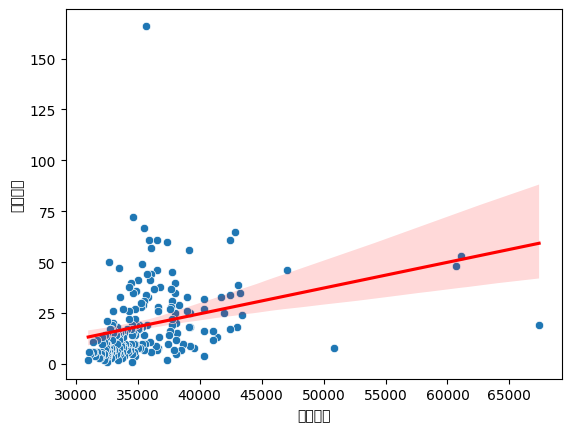

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='평균소득', y='충전소수', data=df)
sns.regplot(x='평균소득', y='충전소수', data=df, scatter=False, color='red')
plt.show()

In [36]:
def process_welfare_vulnerability_analysis(df):
    
    print(f"입력 데이터: {len(df)}개 행")
    print(f"원본 컬럼: {list(df.columns)}")
    
    # 1단계: 데이터 검증 및 정리
    processed_data = []
    
    for i, row in df.iterrows():
        try:
            # 필수 필드 확인
            region_name = str(row.get('지역명', '')).strip()
            if not region_name or region_name == '':
                print(f"행 {i}: 지역명이 없음, 건너뜀")
                continue
            
            # 숫자 필드 안전 변환
            area = float(row.get('면적', 0) or 0)
            if area <= 0:
                area = 1.0  # 0 나누기 방지
            
            welfare_count = int(float(row.get('복지수급자수', 0) or 0))
            bus_count = int(float(row.get('버스정류장수', 0) or 0))
            
            # 기존 계산값이 있는지 확인, 없으면 직접 계산
            welfare_density = float(row.get('복지밀도', 0) or 0)
            if welfare_density == 0:
                welfare_density = welfare_count / area
            
            bus_density = float(row.get('버스밀도', 0) or 0)
            if bus_density == 0:
                bus_density = bus_count / area
            
            composite_score = float(row.get('종합점수', 0) or 0)
            if composite_score == 0:
                composite_score = (welfare_density * 10) - (bus_density * 5)
            
            # 처리된 행 생성
            processed_row = {
                '지역명': region_name,
                '면적': round(area, 2),
                '복지수급자수': welfare_count,
                '버스정류장수': bus_count,
                '복지밀도': round(welfare_density, 3),
                '버스밀도': round(bus_density, 3),
                '종합점수': round(composite_score, 2)
            }
            
            processed_data.append(processed_row)
            
        except Exception as e:
            print(f"행 {i} 처리 오류: {str(e)}, 건너뜀")
            continue
    
    if not processed_data:
        print("처리 가능한 데이터가 없음")
        return pd.DataFrame()
    
    # DataFrame으로 변환
    processed_df = pd.DataFrame(processed_data)
    print(f"처리 후: {len(processed_df)}개 행")
    
    # 2단계: 중복 제거 (지역명 기준으로 가장 완전한 데이터 선택)
    def select_best_row(group):
        """중복된 지역 중 가장 완전한 데이터 선택"""
        if len(group) == 1:
            return group.iloc[0]
        
        # 완전성 점수 계산 (데이터가 있는 필드 개수)
        completeness_scores = []
        for _, row in group.iterrows():
            score = sum([
                1 if row['복지수급자수'] > 0 else 0,
                1 if row['버스정류장수'] > 0 else 0,
                1 if row['면적'] > 1 else 0
            ])
            completeness_scores.append(score)
        
        # 가장 높은 완전성 점수를 가진 행 선택
        best_idx = completeness_scores.index(max(completeness_scores))
        return group.iloc[best_idx]
    
    # 지역명으로 그룹화하여 중복 제거
    unique_df = processed_df.groupby('지역명').apply(select_best_row).reset_index(drop=True)
    print(f"중복 제거 후: {len(unique_df)}개 지역")
    
    # 3단계: 종합점수 정규화 (0-100 스케일)
    if len(unique_df) > 1:
        scores = unique_df['종합점수'].values
        min_score = scores.min()
        max_score = scores.max()
        score_range = max_score - min_score
        
        if score_range > 0:
            # Min-Max 정규화: (x - min) / (max - min) * 100
            normalized_scores = ((scores - min_score) / score_range) * 100
            unique_df['정규화점수'] = np.round(normalized_scores, 1)
        else:
            # 모든 점수가 동일한 경우
            unique_df['정규화점수'] = 50.0
    else:
        # 결과가 1개인 경우
        unique_df['정규화점수'] = 50.0
    
    # 4단계: 종합점수로 정렬 (취약성 높은 순)
    unique_df = unique_df.sort_values('종합점수', ascending=False).reset_index(drop=True)
    
    # 5단계: 통계 정보 추가
    total_beneficiaries = unique_df['복지수급자수'].sum()
    total_bus_stops = unique_df['버스정류장수'].sum()
    avg_score = unique_df['종합점수'].mean()
    
    print(f"\n=== 분석 결과 ===")
    print(f"최종 지역 수: {len(unique_df)}개")
    print(f"총 복지수급자: {total_beneficiaries:,}명")
    print(f"총 버스정류장: {total_bus_stops:,}개")
    print(f"평균 종합점수: {avg_score:.2f}")
    print(f"가장 취약한 지역: {unique_df.iloc[0]['지역명']}")
    print(f"가장 안전한 지역: {unique_df.iloc[-1]['지역명']}")
    
    return unique_df

# 사용 예시
def example_usage():
    """사용 예시"""
    
    # 가상의 SPARQL 결과 DataFrame 생성 (실제로는 SPARQL 쿼리 결과를 사용)
    sample_data = {
        '지역명': ['강남구', '강북구', '강서구', '강남구', '관악구'],  # 중복 포함
        '면적': [39.5, 23.6, 41.4, 39.5, 29.6],
        '복지수급자수': [1500, 3200, 2800, 1500, 4100],
        '버스정류장수': [85, 45, 62, 85, 38],
        '복지밀도': [0, 0, 0, 0, 0],  # SPARQL에서 계산 안된 경우
        '버스밀도': [0, 0, 0, 0, 0],   # SPARQL에서 계산 안된 경우
        '종합점수': [0, 0, 0, 0, 0]     # SPARQL에서 계산 안된 경우
    }
    
    df = pd.DataFrame(sample_data)
    print("원본 데이터:")
    print(df)
    print("\n" + "="*50 + "\n")
    
    # 처리 실행
    result_df = process_welfare_vulnerability_analysis(df)
    
    print("\n처리된 결과:")
    print(result_df)
    
    return result_df


processed_df = process_welfare_vulnerability_analysis(df)

processed_df

입력 데이터: 143개 행
원본 컬럼: ['지역명', '면적', '복지수급자수', '버스정류장수', '복지밀도', '버스밀도', '종합점수']
처리 후: 143개 행
중복 제거 후: 131개 지역

=== 분석 결과 ===
최종 지역 수: 131개
총 복지수급자: 6,228,938명
총 버스정류장: 170,215개
평균 종합점수: 1815.50
가장 취약한 지역: 전라남도 목포시
가장 안전한 지역: 강원특별자치도 인제군


,지역명,면적,복지수급자수,버스정류장수,복지밀도,버스밀도,종합점수,정규화점수
0,전라남도 목포시,51.73,106389,1154,2056.621,22.308,20454.67,100.0
1,경기도 의정부시,81.55,154266,737,1891.674,9.037,18871.55,92.2
2,경기도 군포시,36.42,65623,462,1801.840,12.685,17954.97,87.7
3,경기도 광명시,38.52,62273,455,1616.641,11.812,16107.35,78.7
4,서울특별시,23.91,37225,4002,1556.880,167.378,14731.91,71.9
...,...,...,...,...,...,...,...,...
126,강원특별자치도 양구군,661.99,8234,2,12.438,0.003,124.37,0.3
127,강원특별자치도 정선군,1219.78,15150,58,12.420,0.048,123.96,0.3
128,경상북도 영양군,815.87,9994,588,12.250,0.721,118.89,0.3
129,강원특별자치도 평창군,1464.26,15177,63,10.365,0.043,103.43,0.2


In [39]:
processed_df.head(10)

,지역명,면적,복지수급자수,버스정류장수,복지밀도,버스밀도,종합점수,정규화점수
0,전라남도 목포시,51.73,106389,1154,2056.621,22.308,20454.67,100.0
1,경기도 의정부시,81.55,154266,737,1891.674,9.037,18871.55,92.2
2,경기도 군포시,36.42,65623,462,1801.840,12.685,17954.97,87.7
3,경기도 광명시,38.52,62273,455,1616.641,11.812,16107.35,78.7
4,서울특별시,23.91,37225,4002,1556.880,167.378,14731.91,71.9
5,경기도 구리시,33.34,48775,335,1462.957,10.048,14579.33,71.2
6,경기도 오산시,42.69,47132,464,1104.052,10.869,10986.18,53.6
7,경기도 시흥시,139.94,113309,1215,809.697,8.682,8053.56,39.2
8,경기도 하남시,92.99,56315,607,605.603,6.528,6023.39,29.2
9,경기도 의왕시,54.03,27794,421,514.418,7.792,5105.22,24.7
